In [1]:
from random import randrange

import numpy as np

# %matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.patches as mpt

# Génération d'un circuit

Nous voulions à un moment générer un circuit virtuel, la 1ère étape était de créer un parcours. Dans ce notebook, nous avons un peu expérimenté cette idée. 

In [2]:
def overlap_rect(x1, y1, w1, h1, x2, y2, w2, h2):
    #To know if rectangles overlay each others, one corner must be outside and another be inside
    if x2 <= x1 <= x2+w2 or x2 <= x1+w1 <= x2+w2:
        return True
    if y2 <= y1 <= y2+h2 or y2 <= y1+h1 <= y2+h2:
        return True
    return False

def pt_is_in_rect(pt, list_of_points):
    for point in list_of_points:
        if pt in point:
            continue
        x_pt = pt[0]
        y_pt = pt[1]
        x_list_left_bottom = point[0][0]
        y_list_left_bottom = point[0][1]
        x_list_right_top = point[2][0]
        y_list_right_top = point[2][1]
        if (x_list_left_bottom <= x_pt and x_pt <= x_list_right_top) and (y_list_left_bottom <= y_pt and y_pt <= y_list_right_top):
            return True
    return False

In [3]:
list_of_points = []
list_of_rects = []
MAX_NUMBER_OF_RECTANGLES = 7

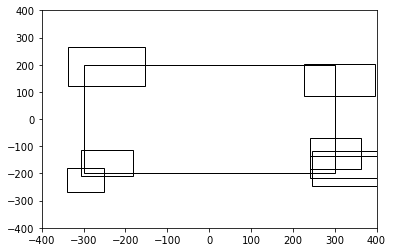

In [4]:
x_base = -300
y_base = -200
width_base = 600
height_base = 400
rec = mpt.Rectangle((x_base, y_base), width_base, height_base, fill = False)

list_of_points.append([[x_base, y_base], [x_base+width_base, y_base], [x_base+width_base, y_base+height_base], [x_base, y_base+height_base]])

fig, ax = plt.subplots(1)
ax.add_patch(rec)
i = 0

while i < MAX_NUMBER_OF_RECTANGLES:
    x = randrange(-350, 250)
    y = randrange(-275, 125)

    width = randrange(80, 200)
    height = randrange(75, 150)
    if overlap_rect(x_base, y_base, width_base, height_base, x, y, width, height):
        j = 0
        pts = [[x, y], [x+width, y], [x+width, y+height], [x, y+height]]
        for pt in pts:
            if list_of_rects and pt_is_in_rect(pt, list_of_points):
                j+=1
    else:
        continue
    
    if j>1:
        continue
    else:
        i += 1

    # Create a Rectangle patch
    rec = mpt.Rectangle((x, y), width, height, fill = False)
    
    # Add the patch to the Axes
    list_of_rects.append(rec)
    ax.add_patch(rec)
    list_of_points.append([[x, y], [x+width, y], [x+width, y+height], [x, y+height]])

plt.xlim(-400,400)
plt.ylim(-400,400)
plt.show()

In [5]:
#Récupérer tous les points d'intersection
points = set()

def get_intersection(x1, y1, x2, y2, all_points):
    intersections = set()
    
    for pts in list_of_points:
        for i in range(4):
            if i!=3:
                x3 = pts[i][0]
                y3 = pts[i][1]
                x4 = pts[i+1][0]
                y4 = pts[i+1][1]
            else:
                x3 = pts[i][0]
                y3 = pts[i][1]
                x4 = pts[0][0]
                y4 = pts[0][1]
            
            #Separer les droites verticales et horizontales !!!!!!
            if x1==x2 and y3==y4:
                if x3<=x1<=x4 or x4<=x1<=x3:
                    if y1>=y3>=y2 or y2>=y3>=y1:
                        intersections.add((x1,y3))

            if y1==y2 and x3==x4:
                if y3<=y1<=y4 or y4<=y1<=y3:
                    if x1>=x3>=x2 or x2>=x3>=x1:
                        intersections.add((x3,y1))
    
    return intersections

for pts in list_of_points:
    x = []
    y = []
    for i in range(4):
        if i!=3:
            points.update(get_intersection(pts[i][0], pts[i][1], pts[i+1][0], pts[i+1][1], list_of_points))
        else:
            points.update(get_intersection(pts[i][0], pts[i][1], pts[0][0], pts[0][1], list_of_points))

print(points)

{(363, -185), (363, -118), (226, 203), (-306, -179), (240, -68), (242, -185), (-338, 122), (-306, -113), (396, 203), (-300, 200), (242, -216), (245, -185), (-153, 200), (-338, 264), (396, 86), (-153, 122), (300, -134), (300, -185), (226, 200), (428, -134), (432, -216), (-250, -267), (300, -200), (226, 86), (-250, -210), (-250, -179), (-181, -113), (-300, -113), (300, -68), (428, -247), (300, 86), (240, -185), (245, -200), (-300, -179), (-300, 122), (245, -134), (-300, -200), (242, -200), (363, -68), (242, -134), (363, -134), (245, -118), (432, -134), (-306, -210), (300, -118), (428, -118), (-153, 264), (-339, -267), (300, 200), (-339, -179), (245, -216), (245, -247), (-250, -200), (-181, -210), (-181, -200), (428, -216)}


In [6]:
print(len(points))

56


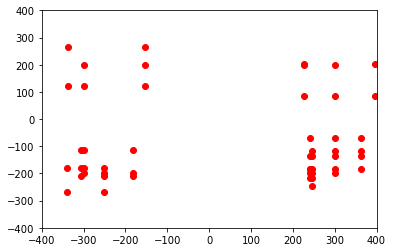

In [7]:
x = []
y = []
pts = []

for pt in points:
    x.append(pt[0])
    y.append(pt[1])

plt.plot(x,y, "ro")
plt.xlim(-400,400)
plt.ylim(-400,400)
plt.show()

In [8]:
# 4 points par rectangle puis dessiner des lignes entre tous les points. Obtenir la même chose mais en retraçant
# les lignes.

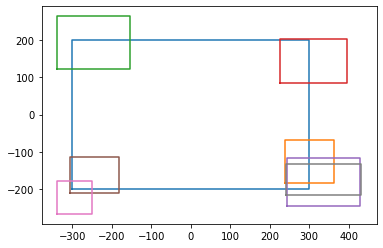

In [9]:
fig, ax = plt.subplots()

for pts in list_of_points:
    x = []
    y = []
    for i in range(4):
        if i!=3:
            x.append(pts[i][0])
            x.append(pts[i+1][0])
            y.append(pts[i][1])
            y.append(pts[i+1][1])
        elif i==3:
            x.append(pts[i][0])
            x.append(pts[0][0])
            y.append(pts[i][1])
            y.append(pts[0][1])
    
    ax.plot(x,y)

plt.show()

In [10]:
print(list_of_points)

[[[-300, -200], [300, -200], [300, 200], [-300, 200]], [[240, -185], [363, -185], [363, -68], [240, -68]], [[-338, 122], [-153, 122], [-153, 264], [-338, 264]], [[226, 86], [396, 86], [396, 203], [226, 203]], [[245, -247], [428, -247], [428, -118], [245, -118]], [[-306, -210], [-181, -210], [-181, -113], [-306, -113]], [[-339, -267], [-250, -267], [-250, -179], [-339, -179]], [[242, -216], [432, -216], [432, -134], [242, -134]]]


In [11]:
#Determinate extern points and eliminate the inside ones
def pt_is_in_rect(pt, list_of_rect):
    for rect in list_of_rect:
        if pt in rect:
            continue
        x_pt = pt[0]
        y_pt = pt[1]
        x_list_left_bottom = rect[0][0]
        y_list_left_bottom = rect[0][1]
        x_list_right_top = rect[2][0]
        y_list_right_top = rect[2][1]
        if (x_list_left_bottom <= x_pt and x_pt <= x_list_right_top) and (y_list_left_bottom <= y_pt and y_pt <= y_list_right_top):
            return True
    return False
    
j=0
good_ones = []
list_all = list_of_points
for pts in list_of_points:
    for pt in pts:
        if pt_is_in_rect(pt, list_all)==False:
            good_ones.append(pt)
    j+=1

        

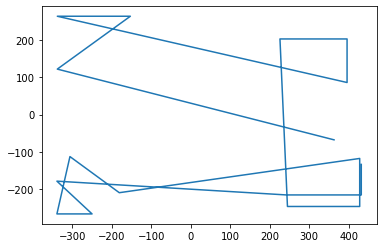

In [12]:
x = []
y = []
pts = []

for pt in good_ones:
    x.append(pt[0])
    y.append(pt[1])
    pts.append((pt[0], pt[1]))

plt.plot(x,y)
plt.show()

In [13]:
print(pts)

[(363, -68), (-338, 122), (-153, 264), (-338, 264), (396, 86), (396, 203), (226, 203), (245, -247), (428, -247), (428, -118), (-181, -210), (-306, -113), (-339, -267), (-250, -267), (-339, -179), (242, -216), (432, -216), (432, -134)]


In [14]:
#Reorder points to get a continuous line
import math
starting_point = pts[randrange(len(pts))]

def distance(pt1, pt2):
    return math.sqrt(math.pow(pt1[0]-pt2[0], 2) + math.pow(pt1[1]-pt2[1], 2))

dist_min = math.inf
for pt in pts:
    if starting_point == pt:
        continue
    dist = distance(pt, starting_point)
    if dist < dist_min:
        dist_min = dist
        nearest = pt
        
# This one is not finished. Can't define which point is nearest from one other and verify that lines
# are not crossing other lines.